# Load Modules & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression


In [2]:
plt.style.use('seaborn-white')
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

# Cleaning and EDA

##  Type Conversion

In [5]:
####  Type conversion
convert_types = ["OperatingSystems", "Browser", "Region", "TrafficType",
                "VisitorType", "Month"]
df[convert_types] = df[convert_types].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null category
OperatingSystems           12330 non-null category
Browser                    12330 non-null category
Region                     12330 non-null category
TrafficType                12330 non-null category
VisitorType                12330 non-null category
Weekend                    12330 non-null bool
Revenue                    12330 non-null bo

##  Split data into 70% train, 30% test

In [7]:
####  Split train and test set
df_trn, df_tst = train_test_split(df, test_size=0.3, random_state=123)

print(df_trn.shape)
print(df_tst.shape)

(8631, 18)
(3699, 18)


##  EDA & Visualize (with Train Data)

In [8]:
## no explicitly coded missing values
print(df_trn.isnull().sum())
print(df_tst.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
W

### [Numeric, integer] Number of pages visited: Administrative, Informational, ProductRelated

In [9]:
page_count_cols = ["Administrative","Informational","ProductRelated"]
print(df_trn.Administrative.unique())
print(df_trn.Informational.unique())
print(df_trn.ProductRelated.unique())

[ 5  1  0 11  6  3  4 10  2 12  9  7  8 16 19 15 13 17 14 23 18 27 24 21
 26 22 20]
[ 1  0  2  4  3  7  6  5  9 10  8 16 12 11 13 14]
[ 77  37   9   1  64  49   7 133  25 224  10  40   8  27  31   5  72  53
   0  34  30  23  46 222   2 106  18  13  28  21  29  22   3  11  20   6
  39  15  42  79  38  35   4 152  36  89  33  16  17 104  26  63  19  96
  50 162  69  88 108  45  14  95  61  12  62  97 136  78  87  56 237  76
  41 137  90  44 221  85  93  83  48  24  68 109  32  47  60  54  66 385
  59  51 115  71  65 105 146 163  70 111  57 161  84  58 135  43  55  86
 126 128 159 151 113 101 117 324  82  94 131 336 124  74  81 145  67  52
 238 358 189 100 210  98 102 195  91 155 167 251 103 357 213 171 217 141
 154 231 275 107 180 121 130 378  75 118 125 129 401 156 202 219 216 114
 174 230 112 157  80  73 199 122 173 262 120 144 200 486 260  92  99 232
 190 204 164 181 116 197 176 170 186 198 127 414 286 140 584 175 134 220
 110 449 256 218 318 340 153 149 280 160 138 261 191 178 150 14

In [10]:
page_count_cols = ["Administrative","Informational","ProductRelated"]
df_trn[page_count_cols].apply(lambda x: (x.min(), x.max()))

Administrative     (0, 27)
Informational      (0, 16)
ProductRelated    (0, 584)
dtype: object

In [11]:
def create_plots(y_name, data, plt_type, log=False):
    y = data[y_name]
    if plt_type == 'violin':
        if log:
            sns.violinplot(y=y.apply(lambda x: math.log(x+1)), x="Revenue", data=data)
        else:
            sns.violinplot(y=y, x="Revenue", data=data)
    elif plt_type == 'boxplot':
        if log:
            sns.boxplot(y=y.apply(lambda x: math.log(x+1)), x="Revenue", data=data)
        else:
            sns.boxplot(y=y, x="Revenue", data=data)

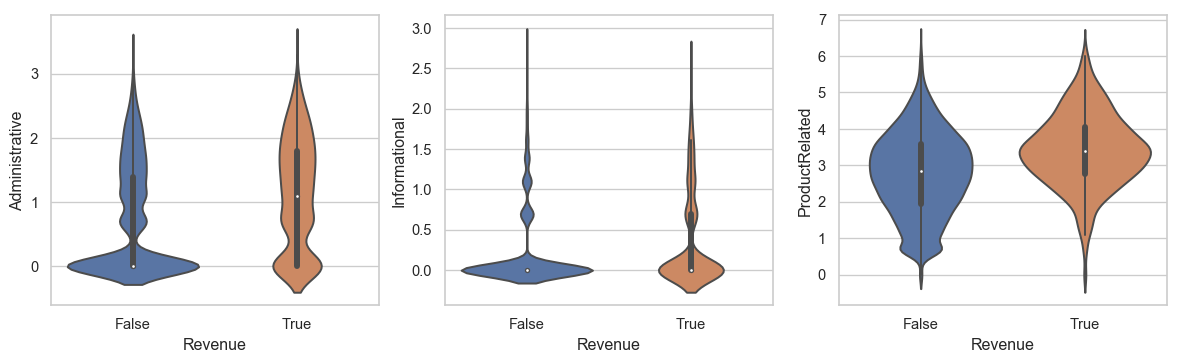

In [12]:
plt.figure(figsize=(15, 4), dpi=96)

plt.subplot(1,3,1)
create_plots(y_name="Administrative", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,2)
create_plots(y_name="Informational", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,3)
create_plots(y_name="ProductRelated", data=df_trn, plt_type="violin", log=True)

plt.show()

#### Percentages of webpages visited

In [13]:
page_count = df_trn[page_count_cols].groupby(df_trn.Revenue).mean()
page_count

,Administrative,Informational,ProductRelated
Revenue,,,
False,2.129705,0.450764,28.380251
True,3.386451,0.755196,49.152425


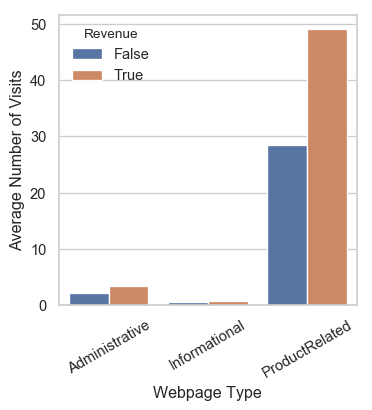

In [14]:
plt.figure(figsize=(4, 4), dpi=96)
page_count_plt = pd.melt(page_count.reset_index(), id_vars='Revenue',
                         var_name="Webpage Type", value_name="Average Number of Visits")
page_count_plt["Webpage Type"] = page_count_plt["Webpage Type"].astype(str).str.replace("_Duration", "")
sns.barplot(x="Webpage Type", y="Average Number of Visits", hue="Revenue", 
            data=page_count_plt)
plt.xticks(rotation=30)
plt.show()

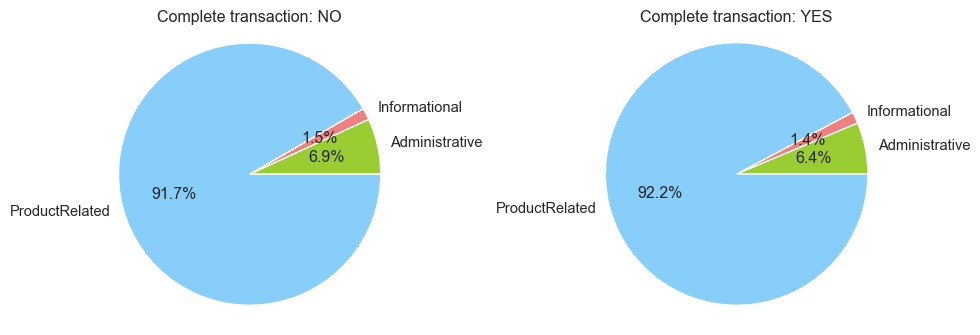

In [15]:
plt.figure(figsize=(12, 4), dpi=96)
                   
plt.subplot(1,2,1)
plt.pie(page_count.iloc[0,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(page_count.iloc[1,:], labels=page_count.columns,
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()

### [Numeric, float] Duration spent on each type of webpage

In [16]:
page_time_cols = ["Administrative_Duration","Informational_Duration","ProductRelated_Duration"]
df_trn[page_time_cols].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,8631.000000,8631.000000,8631.000000
mean,80.035963,33.735985,1179.548652
std,173.132521,138.995400,1895.590842
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,182.208333
50%,7.000000,0.000000,593.701980
75%,93.115833,0.000000,1439.177083
max,3398.750000,2549.375000,63973.522230


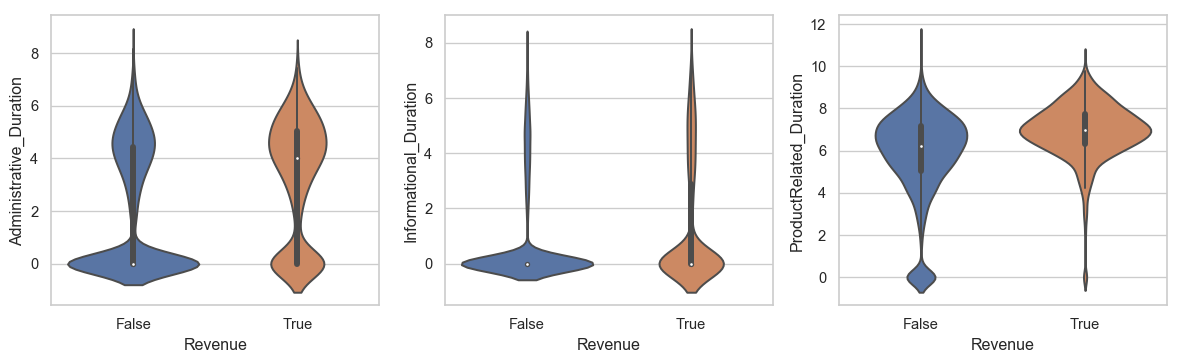

In [17]:
plt.figure(figsize=(15, 4), dpi=96)

plt.subplot(1,3,1)
create_plots(y_name="Administrative_Duration", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,2)
create_plots(y_name="Informational_Duration", data=df_trn, plt_type="violin", log=True)
plt.subplot(1,3,3)
create_plots(y_name="ProductRelated_Duration", data=df_trn, plt_type="violin", log=True)

plt.show()

#### Percentages of time spent in two classes 

In [18]:
page_time = df_trn[page_time_cols].groupby(df_trn.Revenue).mean()
page_time

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Revenue,,,
False,73.279805,29.367028,1050.588566
True,118.170030,58.395874,1907.443457


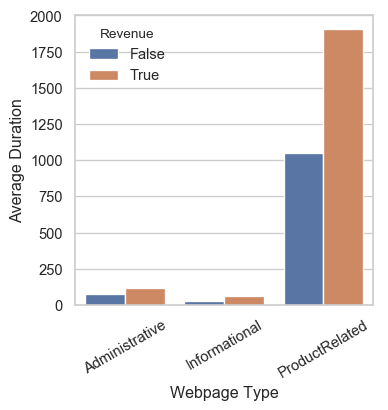

In [19]:
plt.figure(figsize=(4, 4), dpi=96)
page_time_plt = pd.melt(page_time.reset_index(), id_vars='Revenue',
                       var_name="Webpage Type", value_name="Average Duration")
page_time_plt["Webpage Type"] = page_time_plt["Webpage Type"].astype(str).str.replace("_Duration", "")
sns.barplot(x="Webpage Type", y="Average Duration", hue="Revenue", 
            data=page_time_plt)
plt.xticks(rotation=30)
plt.show()

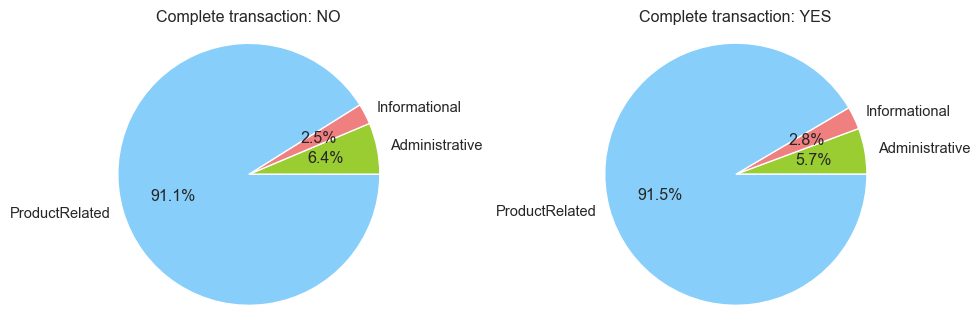

In [20]:
plt.figure(figsize=(12, 4), dpi=96)
                   
plt.subplot(1,2,1)
plt.pie(page_time.iloc[0,:], labels=page_time.columns.str.replace("_Duration",""),
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: NO')

plt.subplot(1,2,2)
plt.pie(page_time.iloc[1,:], labels=page_time.columns.str.replace("_Duration",""),
        autopct='%1.1f%%', shadow=False, 
        colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
plt.axis('equal')
plt.title('Complete transaction: YES')

plt.show()

Summary:
+ It appears that on average, people who complete transactions visit more webpages, and spend more time on these webpages.
+ There doesn't seem to be a clear difference in the type of webpage visited between people who complete the purchase and those who don't.

### [Numeric] Google Analytics web metrics: Bounce Rates, Exit Rates, Page Values

In [21]:
ga_metrics = ["BounceRates", "ExitRates", "PageValues"]
df_trn[ga_metrics].describe()

,BounceRates,ExitRates,PageValues
count,8631.000000,8631.000000,8631.000000
mean,0.022252,0.043180,5.765987
std,0.048634,0.048648,18.215382
min,0.000000,0.000000,0.000000
25%,0.000000,0.014286,0.000000
50%,0.003077,0.025466,0.000000
75%,0.017124,0.050000,0.000000
max,0.200000,0.200000,361.763742


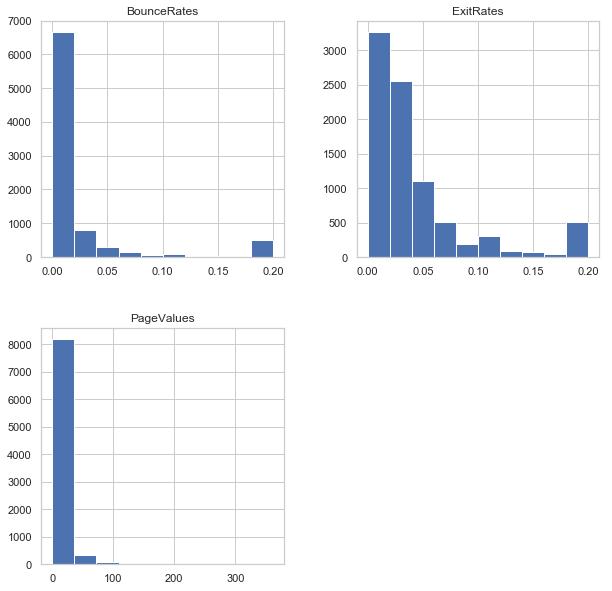

In [22]:
_ = df_trn[ga_metrics].hist(bins=10, figsize=(10,10))

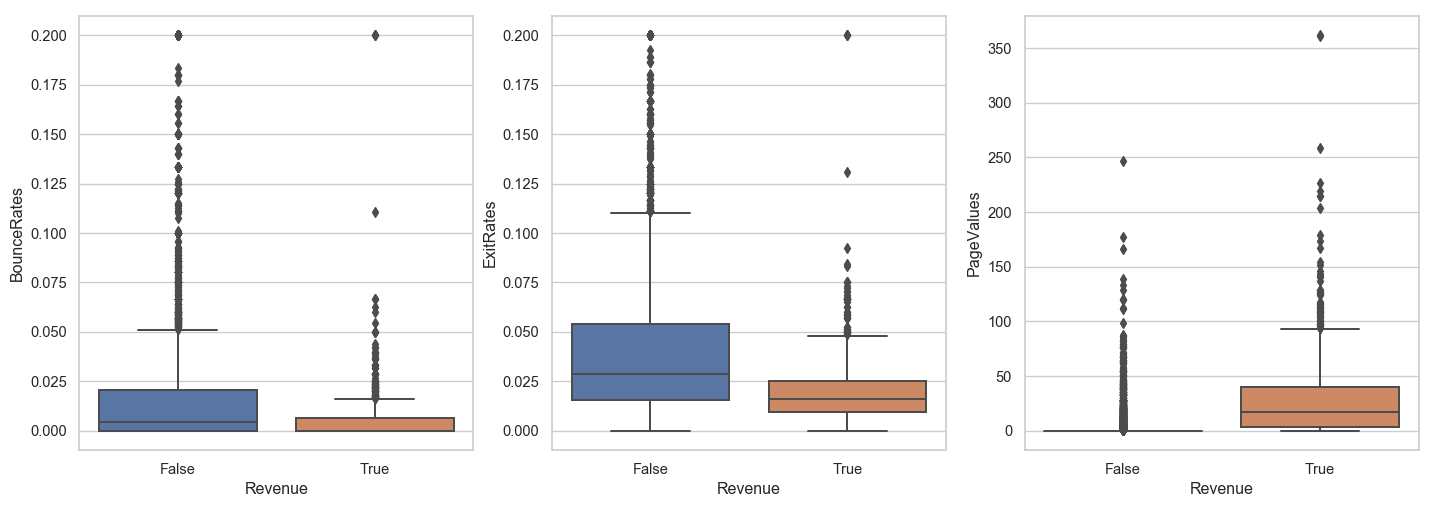

In [23]:
plt.figure(figsize=(18, 6), dpi=96)
plt.subplot(1,3,1)
create_plots(y_name="BounceRates", data=df_trn, plt_type="boxplot", log=False)
plt.subplot(1,3,2)
create_plots(y_name="ExitRates", data=df_trn, plt_type="boxplot", log=False)
plt.subplot(1,3,3)
create_plots(y_name="PageValues", data=df_trn, plt_type="boxplot", log=False)
plt.show()

#### One-way ANOVA comparing GA web metrics between class

In [24]:
br_fstat, br_pval = f_oneway(df_trn[df_trn.Revenue].BounceRates, df_trn[~df_trn.Revenue].BounceRates)
er_fstat, er_pval = f_oneway(df_trn[df_trn.Revenue].ExitRates, df_trn[~df_trn.Revenue].ExitRates)
pv_fstat, pv_pval = f_oneway(df_trn[df_trn.Revenue].PageValues, df_trn[~df_trn.Revenue].PageValues)
print(br_pval, er_pval, pv_pval)

4.035653605262209e-44 1.3506058001624371e-83 0.0


Summary: 
+ The three GA metrics are significantly difference in mean between classes, suggesting they may be important features for prediction

### [Numeric] Special Day

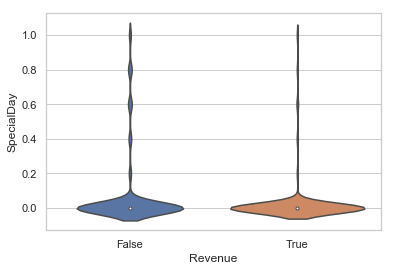

In [25]:
create_plots(y_name="SpecialDay", data=df_trn, plt_type="violin", log=False)

In [26]:
sd_fstat, sd_pval = f_oneway(df_trn[df_trn.Revenue].SpecialDay, df_trn[~df_trn.Revenue].SpecialDay)
sd_pval

2.2319791084431413e-14

In [27]:
print(df_trn[df_trn.Revenue].SpecialDay.mean())
print(df_trn[~df_trn.Revenue].SpecialDay.mean())

0.02386451116243264
0.07032187670485544


### [Categorical] Visit session info: OperatingSystems, Browser, TrafficType

In [28]:
def create_piechart(y_name, data):
    freq_tb = data[y_name].groupby(data.Revenue).value_counts()
    freq_tb = freq_tb.unstack(level='Revenue').fillna(0).transpose()
    print(freq_tb)
    
    plt.figure(figsize=(12, 4), dpi=96)
                   
    plt.subplot(1,2,1)
    plt.pie(freq_tb.iloc[0,:], labels=freq_tb.columns,
            autopct='%1.1f%%', shadow=False)#, 
            #colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
    plt.axis('equal')
    plt.title('Complete transaction: NO')

    plt.subplot(1,2,2)
    plt.pie(freq_tb.iloc[1,:], labels=freq_tb.columns,
            autopct='%1.1f%%', shadow=False)#, 
            #colors=['yellowgreen', 'lightcoral', 'lightskyblue'])
    plt.axis('equal')
    plt.title('Complete transaction: YES')

OperatingSystems       1       2       3      4    5     6    7     8
Revenue                                                              
False             1570.0  3784.0  1632.0  280.0  5.0  14.0  5.0  42.0
True               258.0   780.0   185.0   57.0  0.0   2.0  1.0  16.0


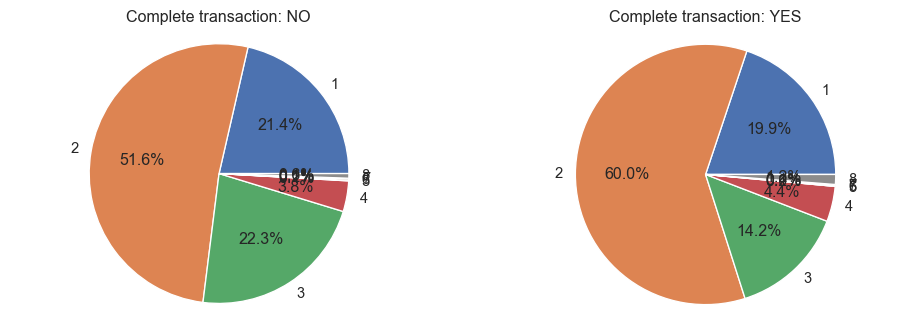

In [29]:
create_piechart("OperatingSystems", df_trn)

Browser      1       2     3      4      5      6     7     8    9     10  \
Revenue                                                                     
False    1501.0  4709.0  70.0  414.0  285.0  106.0  29.0  85.0  1.0  92.0   
True      253.0   848.0   3.0   76.0   54.0   11.0   5.0  13.0  0.0  18.0   

Browser   11   12    13  
Revenue                  
False    5.0  6.0  29.0  
True     0.0  2.0  16.0  


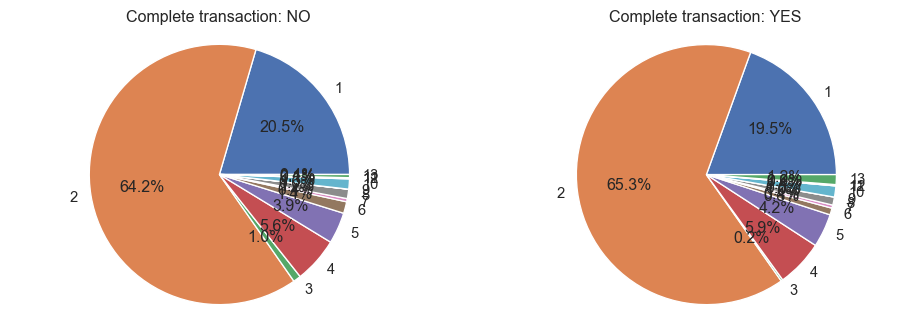

In [30]:
create_piechart("Browser", df_trn)

TrafficType      1       2       3      4      5      6     7      8     9   \
Revenue                                                                       
False        1516.0  2180.0  1304.0  630.0  142.0  279.0  22.0  182.0  32.0   
True          181.0   588.0   123.0  107.0   37.0   35.0   9.0   58.0   1.0   

TrafficType     10     11   12     13   14    15   16   18   19    20  
Revenue                                                                
False        259.0  138.0  1.0  496.0  8.0  28.0  2.0  7.0  8.0  98.0  
True          62.0   31.0  0.0   28.0  1.0   0.0  1.0  0.0  0.0  37.0  


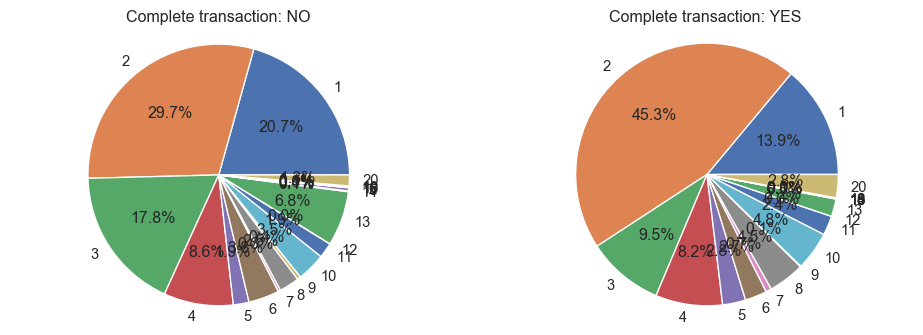

In [31]:
create_piechart("TrafficType", df_trn)

### [Categorical] Demographics of visitors: VisitorType, Region

VisitorType  New_Visitor  Other  Returning_Visitor
Revenue                                           
False                906     47               6379
True                 296     16                987


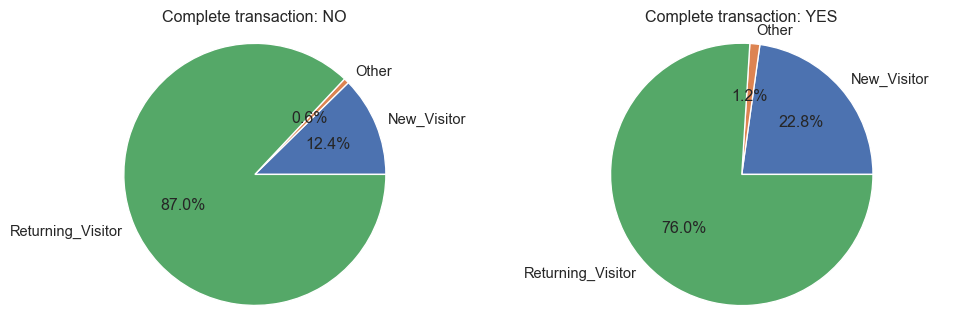

In [32]:
create_piechart("VisitorType", df_trn)

Summary:
+ New visitors take up a larger percentage in those who complete transaction, while there are more returning visitors among those who do not complete the purchase.

Region      1    2     3    4    5    6    7    8    9
Revenue                                               
False    2832  649  1435  713  191  496  452  262  302
True      531  133   221  125   42   71   71   39   66


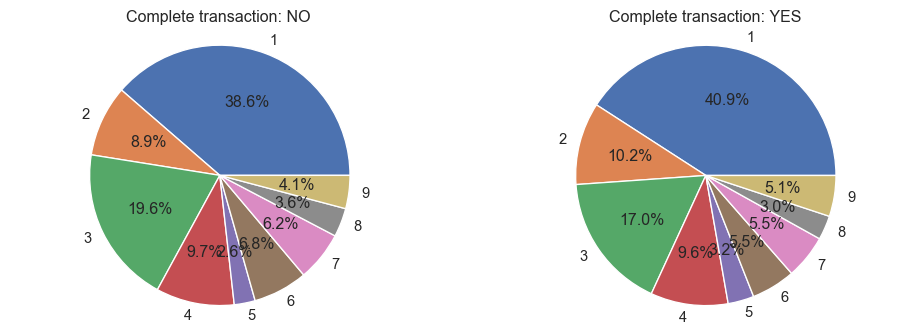

In [33]:
create_piechart("Region", df_trn)

### [Categorical] Time: Weekend, Month

Weekend  False  True 
Revenue              
False     5651   1681
True       959    340


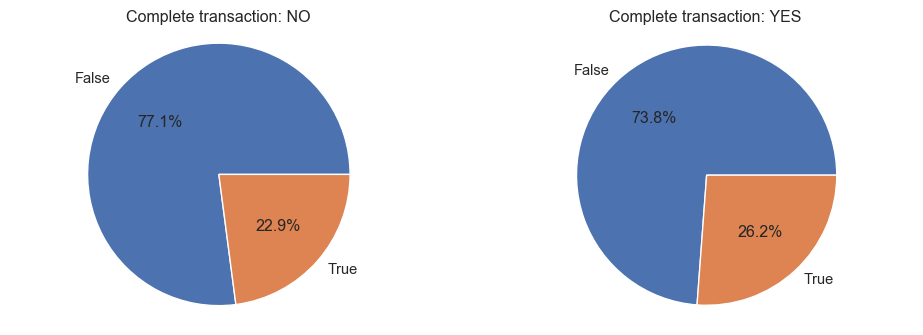

In [34]:
create_piechart("Weekend", df_trn)

Month    Aug   Dec  Feb  Jul  June   Mar   May   Nov  Oct  Sep
Revenue                                                       
False    256  1081  135  246   177  1207  2110  1561  305  254
True      50   149    2   50    20   121   246   526   76   59


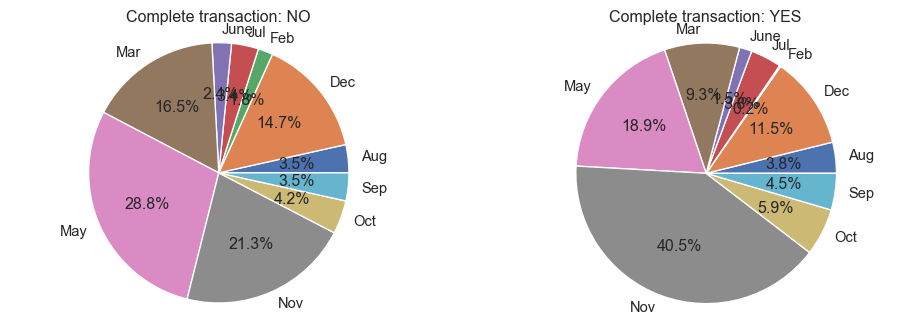

In [35]:
create_piechart("Month", df_trn)

Summary:
+ In novermber, more visitors tend to complete the purchase - for holiday seasons?

# Building Classifiers

## Feature engineering and representations

In [36]:
cat_vars = ["OperatingSystems", "Browser", "Region", 
            "TrafficType", "VisitorType", "Weekend", "Month"]
num_vars = list(set(df.columns) - set(cat_vars + ["Revenue"]))

## create one-hot vectors for categorical variables
onehot = OneHotEncoder()

# combine train and test to convert categorical variables
df_trn['isTrain'] = True
df_tst['isTrain'] = False
df_concat = pd.concat([df_trn, df_tst], axis=0)
print(df_concat.shape)
df_concat.head()

(12330, 19)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,isTrain
2476,5,626.000000,1,66.0,77,2660.150000,0.0,0.008228,41.925190,0.0,May,1,1,3,2,Returning_Visitor,False,False,True
582,1,43.000000,0,0.0,37,1505.166667,0.0,0.005263,0.000000,0.0,Mar,2,2,4,8,New_Visitor,False,False,True
10029,0,0.000000,0,0.0,9,258.291667,0.0,0.022222,0.000000,0.0,Nov,2,5,3,2,Returning_Visitor,False,False,True
1154,0,0.000000,0,0.0,1,0.000000,0.2,0.200000,0.000000,0.0,Mar,1,1,1,9,Returning_Visitor,True,False,True
1579,11,348.654762,1,11.0,64,1229.289286,0.0,0.002494,54.951269,0.0,Mar,2,2,1,2,New_Visitor,False,False,True


In [37]:
df_concat_category = onehot.fit_transform(df_concat[cat_vars]).toarray()
df_concat_category = pd.DataFrame(df_concat_category)
print(df_concat_category.shape)
df_concat_category.head()

(12330, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
df_concat_merged = pd.concat([df_concat[num_vars], df_concat[['isTrain', 'Revenue']],
                              df_concat_category], axis=1)
print(df_concat_merged.shape)
df_concat_merged.head()

(12330, 77)


,Informational,SpecialDay,ProductRelated_Duration,Administrative,BounceRates,ProductRelated,Administrative_Duration,PageValues,Informational_Duration,ExitRates,...,55,56,57,58,59,60,61,62,63,64
0,0,0.0,0.000000,0,0.20,1,0.0,0.0,0.0,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0.0,64.000000,0,0.00,2,0.0,0.0,0.0,0.10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.0,0.000000,0,0.20,1,0.0,0.0,0.0,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0.0,2.666667,0,0.05,2,0.0,0.0,0.0,0.14,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.0,627.500000,0,0.02,10,0.0,0.0,0.0,0.05,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
df_trn_trans = df_concat_merged[df_concat_merged.isTrain]
df_tst_trans = df_concat_merged[~df_concat_merged.isTrain]
df_trn_trans.drop('isTrain', inplace=True, axis=1)
df_tst_trans.drop('isTrain', inplace=True, axis=1)
print(df_trn_trans.shape)
print(df_tst_trans.shape)
#df_trn_trans.columns

(8631, 76)
(3699, 76)


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
print(df_trn_trans.drop('Revenue', axis=1).shape)
print(df_trn_trans.shape)

(8631, 75)
(8631, 76)


In [41]:
trn_X = df_trn_trans.drop('Revenue', axis=1)
tst_X = df_tst_trans.drop('Revenue', axis=1)
trn_y = df_trn_trans.Revenue
tst_y = df_tst_trans.Revenue
print(trn_X.shape)
print(tst_X.shape)
print(trn_y.shape)
print(tst_y.shape)

(8631, 75)
(3699, 75)
(8631,)
(3699,)


## K nearest neighbors (KNN)

In [42]:
knn_auc_trn = []
knn_auc_tst = []

k_seq = range(1, 21)
for k in k_seq:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trn_X, trn_y)
    
    knn_pred_trn = knn.predict(trn_X)
    knn_pred_tst = knn.predict(tst_X)
    
    knn_auc_trn.append(roc_auc_score(trn_y, knn_pred_trn))
    knn_auc_tst.append(roc_auc_score(tst_y, knn_pred_tst))

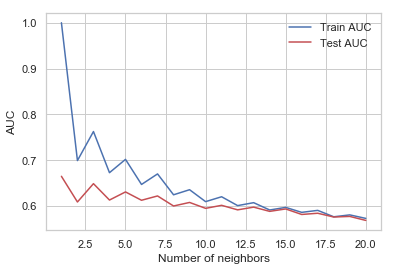

In [43]:
plt.plot(list(k_seq), knn_auc_trn, 'b', label='Train AUC')
plt.plot(list(k_seq), knn_auc_tst, 'r', label='Test AUC')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('AUC')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(trn_X, trn_y)
    
knn_pred_trn = knn.predict(trn_X)
knn_pred_tst = knn.predict(tst_X)
    
print(roc_auc_score(trn_y, knn_pred_trn))
print(roc_auc_score(tst_y, knn_pred_tst))

0.609817888366854
0.5951838921038788


## Naive Bayes

## Logistic regression

## Random Forest

## SVM

## Neural Network (Multi-layer Perception)